## Plot pixel maps

In [1]:
import numpy as np
import zlib
import matplotlib.pylab as plt

In [2]:
def get_map(path):
    # Open the file in binary mode and read its content
    with open(path, 'rb') as f:
        compressed_data = f.read()

    # Decompress the data and convert it to a NumPy array
    pixel_maps = np.frombuffer(zlib.decompress(compressed_data), dtype=np.uint8)
    pixel_maps = pixel_maps.reshape(3, 300, 300)
    return pixel_maps

In [3]:
def plot_image(pixel_maps):
    fig, axs = plt.subplots(1, 3, figsize=(15, 4))
    fig.suptitle('Pixel Maps')        
    titles = ['U', 'V', 'Z']
    data_masked = np.ma.masked_where(pixel_maps == 0, pixel_maps)
    for i in range(3):
        #maps = np.swapaxes(data_masked[i], 0, 1)
        maps = data_masked[i]  # Directly assign without swapping axes
        axs[i].imshow(maps, interpolation='none', cmap = 'plasma', aspect='auto',  vmin = 0)
        axs[i].set_xlabel('Wire')
        axs[i].set_ylabel('TDC')
        axs[i].invert_yaxis()

        axs[i].title.set_text(titles[i])
    plt.show()

In [4]:
map1 = get_map('/Users/aaronhiguera/HEP/DUNE/DUNE_CNN/cnn_v2/test_maps/event_r50231162_s1_e99607_h1739836902.gz')

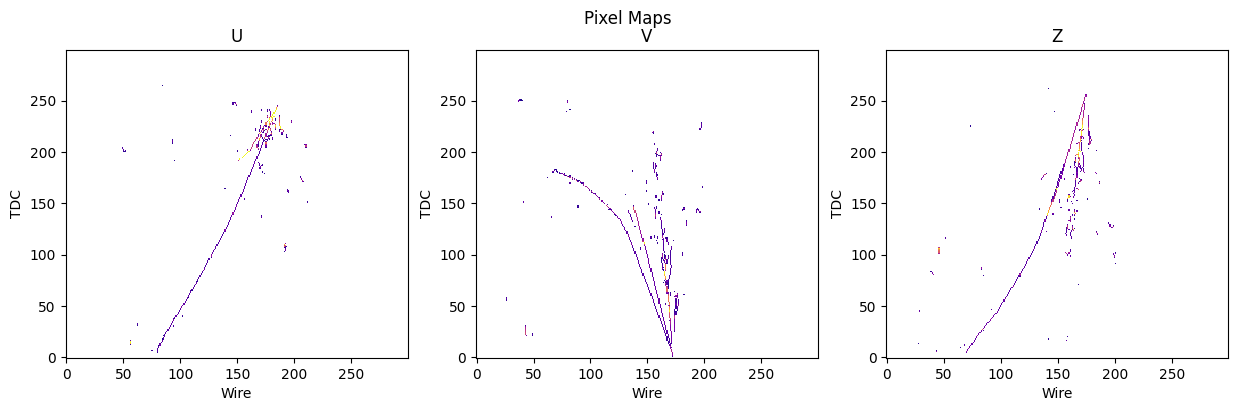

In [5]:
plot_image(map1)